# Урок 6. Наивный байесовский классификатор

В уроке мы подробно рассмотрели, как работает наивный байесовский классификатор, на примере частотной таблицы. Такие данные на практике встречаются довольно редко (если вы не работаете с классификацией текстов), поэтому сейчас предлагаем самостоятельно разобрать принцип работы гауссовского наивного Байеса, который можно встретить чаще остальных.

### 1.
Посмотрим, что включает в себя новый датасет Wine, где собраны результаты химического анализа вин, выращенных в одном регионе Италии тремя различными культиваторами. В наборе каждый из объектов имеет 13 числовых признаков.

Изучим попарные графики признаков (в уроках мы рассматривали их с помощью функции pd.plotting.scatter_matrix() ) и выберем такие два признака, используя которые, можно будет лучше всего разделить данные по трем классам. Модель гауссовского наивного Байеса использует для предсказаний среднее и разброс значений признаков относительно среднего, поэтому вероятнее всего, лучшими признаками будут те, значения которых на графике разбросаны примерно одинаково от среднего значения, но как можно меньше накладываются на признаки других классов.

*Примечание: для наглядности в параметрах функции построения графиков примените figsize=(25, 25) - это позволит отобразить график достаточного размера для того, чтобы его изучить.*

In [5]:
from sklearn.datasets import load_wine
import pandas as pd

In [6]:
load_wine = load_wine()


C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\datasets\base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision

In [ ]:
Посмотрим на поля в датасете.

In [9]:
load_wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
Посмотрим на название фичей

In [11]:
load_wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
Посмотрим на классы, которые у нас есть и которые мы должны отделять друг от друга

In [13]:
load_wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
Посмотрим на количество записей. У нас 13 фичей и 178 щаписей по ним.

In [16]:
load_wine['data'].shape

(178, 13)

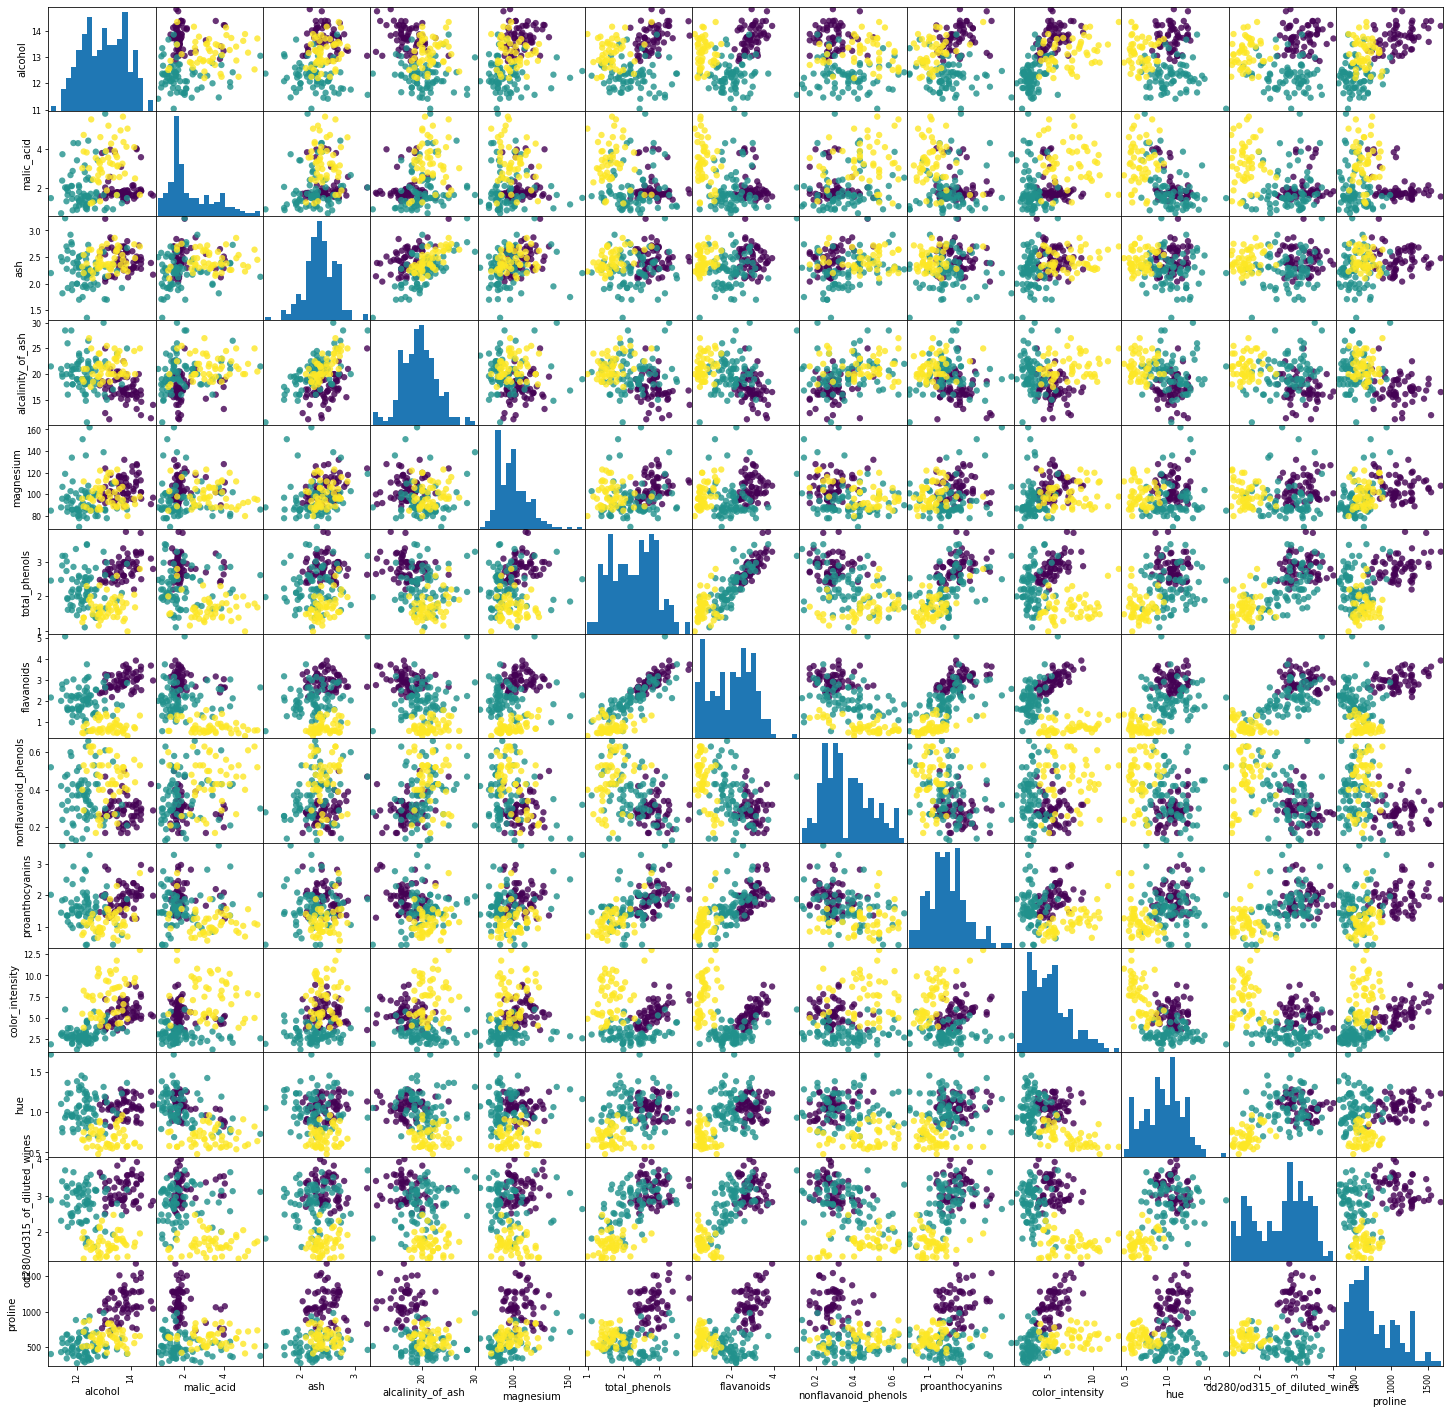

In [19]:
wine_df = pd.DataFrame(load_wine['data'], columns=load_wine.feature_names)

scat_mtrx = pd.plotting.scatter_matrix(wine_df, c = load_wine['target'], figsize=(25, 25), marker='o', hist_kwds={'bins': 20}, s=40, alpha=.8)


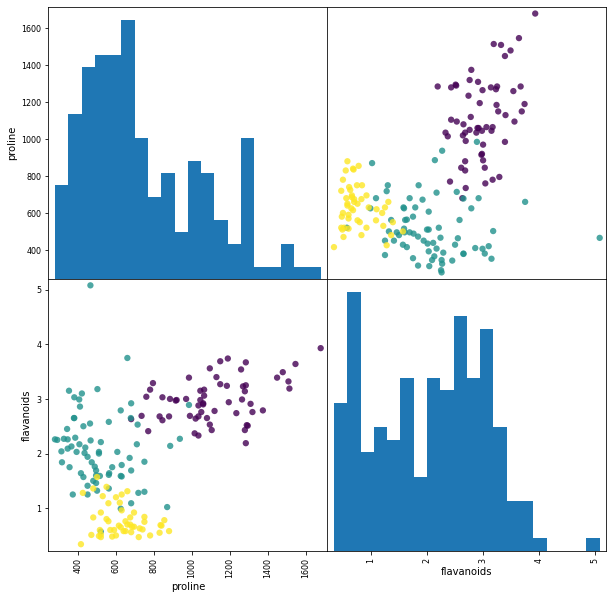

In [21]:
wine_df_simple = wine_df[['proline','flavanoids']]
scat_mtrx = pd.plotting.scatter_matrix(wine_df_simple, c=load_wine['target'], figsize=(10, 10), marker='o', hist_kwds={'bins': 20}, s=40, alpha=.8)

### 2.
Разбейте данные на тренировочный и тестовый датасеты (при разбиении используйте параметр random_state=17 для воспроизводимости результатов) и постройте модель на двух выбранных признаках. Используя встроенную функцию *score()*, проверьте точность работы модели. Если score() меньше 0.88..., выберите по графику другие два признака и постройте модель на них. Укажите номера признаков, которые вы использовали (помните, что индекс массива признаков начинается с 0).

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(wine_df_simple, load_wine['target'], random_state = 17) # random_state - для воспроизводимости

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (133, 2), y_train shape: (133,),
X_test shape: (45, 2), y_test shape: (45,)


In [24]:
nb = GaussianNB()

У модели GaussianNB есть метод predict_proba(test), который возвращает вероятности принадлежности каждого объекта из *test* к каждому из классов. 

In [25]:
nb_model = nb.fit(x_train, y_train)

In [26]:
nb_model_pred = nb_model.predict_proba(x_test)
nb_model_pred

array([[4.71295356e-03, 9.95287012e-01, 3.48056400e-08],
       [1.28119936e-04, 9.98343195e-01, 1.52868461e-03],
       [8.61363655e-04, 9.98729568e-01, 4.09068034e-04],
       [9.99987425e-01, 1.25745788e-05, 6.24404851e-19],
       [8.84075033e-08, 7.99888733e-02, 9.20011038e-01],
       [1.46869928e-05, 4.13172863e-01, 5.86812450e-01],
       [9.99993071e-01, 6.92868909e-06, 6.71436166e-21],
       [2.16112797e-03, 9.97837860e-01, 1.01197140e-06],
       [4.28618157e-10, 1.21633643e-01, 8.78366356e-01],
       [9.98445989e-01, 1.55401128e-03, 2.54290585e-16],
       [1.17757329e-08, 5.91152508e-02, 9.40884737e-01],
       [9.99961061e-01, 3.89394658e-05, 1.86888530e-13],
       [6.35703236e-05, 4.18653164e-01, 5.81283266e-01],
       [7.16975764e-03, 9.92482978e-01, 3.47264492e-04],
       [1.42698250e-05, 7.95763817e-01, 2.04221914e-01],
       [1.93290698e-07, 6.82330041e-02, 9.31766803e-01],
       [1.55687542e-09, 1.15953839e-01, 8.84046160e-01],
       [2.54223752e-04, 9.86897

In [33]:
accuracy = nb_model.score(X = x_test, y = y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9333333333333333


### 3.
Еще раз обучите модель на признаках с номерами 11, 12, предварительно снова разбив данные на тренировочные и тестовые (с random_state=17). С помощью функции predict_proba() посмотрите, какие вероятности были вычислены для каждого из классов, и выведите эти вероятности для объекта x_test[0].

Соответсвенно 11 и 12 признаки 'hue', 'od280/od315_of_diluted_wines'

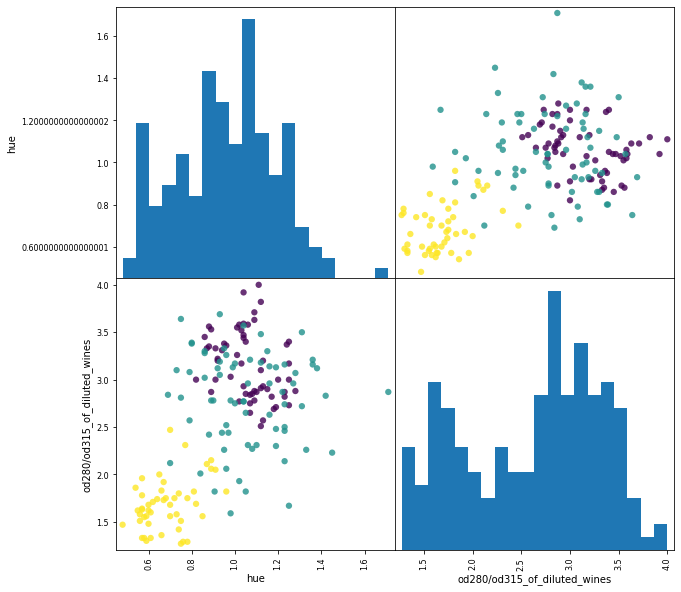

In [34]:
wine_df_simple = wine_df[['hue','od280/od315_of_diluted_wines']]
scat_mtrx = pd.plotting.scatter_matrix(wine_df_simple, c=load_wine['target'], figsize=(10, 10), marker='o', hist_kwds={'bins': 20}, s=40, alpha=.8)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(wine_df_simple, load_wine['target'], random_state = 17) # random_state - для воспроизводимости

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (133, 2), y_train shape: (133,),
X_test shape: (45, 2), y_test shape: (45,)


In [36]:
nb = GaussianNB()

In [37]:
nb_model = nb.fit(x_train, y_train)

In [46]:
nb_model_pred = nb_model.predict_proba(x_test)
nb_model_pred = nb_model_pred[0,:]
print(f'Веротность для класса 1: {nb_model_pred[0]};\nВеротность для класса 2: {nb_model_pred[1]};\nВеротность для класса 3: {nb_model_pred[2]}')

Веротность для класса 1: 0.3774857750198471;
Веротность для класса 2: 0.6222282801677197;
Веротность для класса 3: 0.0002859448124332632


In [39]:
accuracy = nb_model.score(X = x_test, y = y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7333333333333333
